### Binary Search Algorithm

Loading required package: abc.data

Loading required package: nnet

Loading required package: quantreg

Loading required package: SparseM


Attaching package: ‘SparseM’


The following object is masked from ‘package:base’:

    backsolve


Loading required package: MASS

Loading required package: locfit

locfit 1.5-9.7 	 2023-01-02



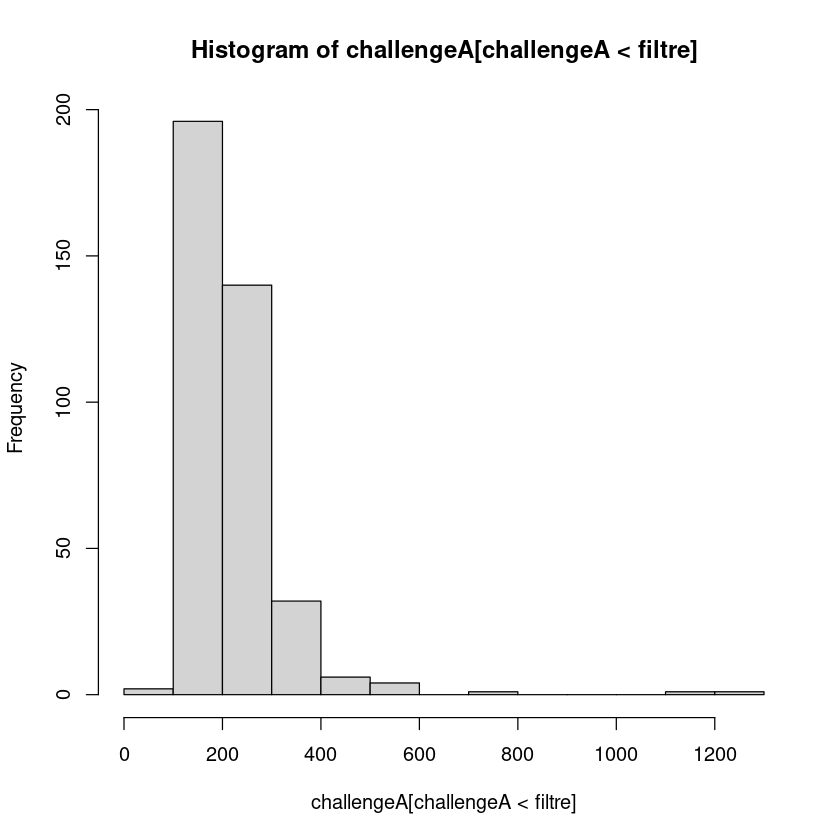

In [7]:
library(abc)
challengeA = scan("dataChallengeB7e-6.txt")

filtre = 10*median(challengeA)

#hist(challengeA, freq=FALSE)
hist(challengeA[challengeA<filtre])

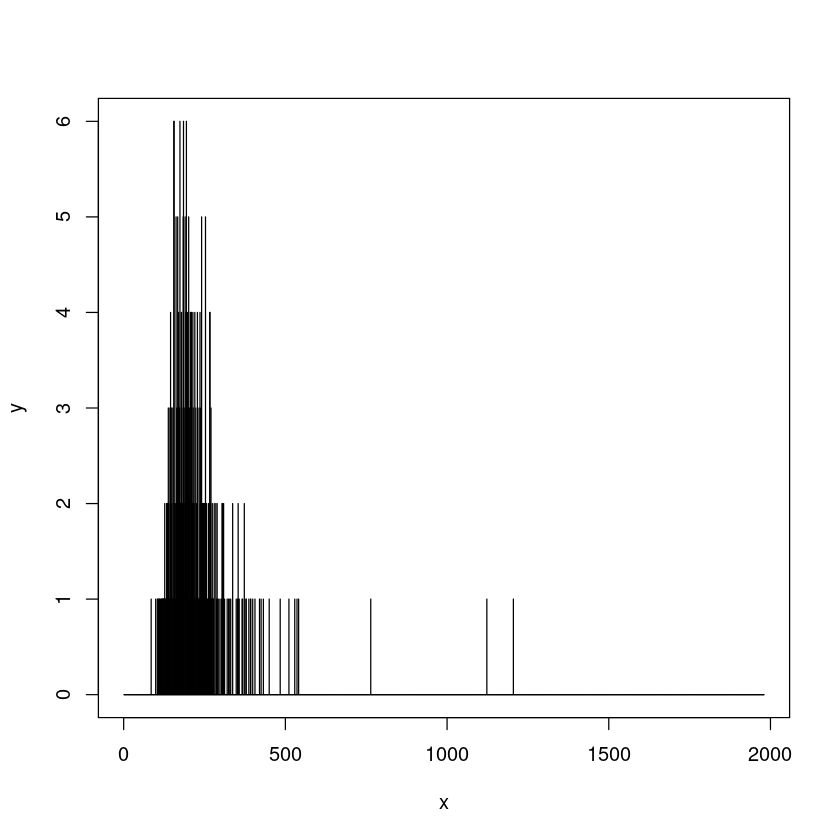

In [8]:
x = c(1:filtre)
y = c(1:filtre)

i = 0
for(i in 1:filtre) {
    y[i] = sum(challengeA == i)
}

plot(x, y, type="h")

In [9]:
mu_init = median(challengeA)/1e7
commande = sprintf("./atreyu_forward_simulator 10,1e7 0 %e 0.7 1 384 | cut -d' ' -f1 > TauxMutation2.txt", mu_init)
system(commande)
TauxMutation = scan("TauxMutation2.txt")
test_ks = ks.test(TauxMutation, challengeA[challengeA < filtre])
distance_to_curve = test_ks$statistic
p_value = test_ks$p.value
mouvement_gauche = TRUE
mouvement_droite = TRUE
pas = mu_init/4
counter = 0
cmax = 20

while (distance_to_curve > 0.05) {
    mu_gauche = max(mu_init - pas, 1e-7)
    mu_droite = mu_init + pas
    distance_to_curve_gauche = 0
    p_value_gauche = 0
    commande_gauche = sprintf("./atreyu_forward_simulator 10,1e7 0 %e 0.7 1 3840 | cut -d' ' -f1 > TauxMutation2.txt", mu_gauche)
    
    system(commande_gauche)
    TauxMutation = scan("TauxMutation2.txt")
    test_ks = ks.test(TauxMutation, challengeA[challengeA < filtre])
    distance_to_curve_gauche = test_ks$statistic
    p_value_gauche = test_ks$p.value
        
    distance_to_curve_droite = 0
    p_value_droite = 0
    commande_droite = sprintf("./atreyu_forward_simulator 10,1e7 0 %e 0.7 1 3840 | cut -d' ' -f1 > TauxMutation2.txt", mu_droite)
    
    system(commande_droite)
    TauxMutation = scan("TauxMutation2.txt")
    test_ks = ks.test(TauxMutation, challengeA[challengeA < filtre])
    distance_to_curve_droite = test_ks$statistic
    p_value_droite = test_ks$p.value

        
    if ((distance_to_curve_droite < distance_to_curve_gauche) && (distance_to_curve_droite < distance_to_curve)) {
        mouvement_gauche = FALSE
        if (!mouvement_droite) {
            if (pas > median(challengeA)/1e8) {
                pas = pas/2
            }
            mouvement_droite = TRUE
        }
        # if (distance_to_curve_droite == distance_to_curve) {
        #     counter = counter + 1
        # }
        # else {
        #     counter = 0
        # }
        counter = 0
        distance_to_curve = distance_to_curve_droite
        mu_init = mu_droite
    }
    else if ((distance_to_curve_gauche < distance_to_curve_droite) && (distance_to_curve_gauche < distance_to_curve)) {
        mouvement_droite = FALSE
        if (!mouvement_gauche) {
            if (pas > median(challengeA)/1e8) {
                pas = pas/2
            }
            mouvement_gauche = TRUE
        }
        # if (distance_to_curve_gauche == distance_to_curve) {
        #     counter = counter + 1
        # }
        # else {
        #     counter = 0
        # }
        counter = 0
        distance_to_curve = distance_to_curve_gauche
        mu_init = mu_gauche
    }
    else {
        mouvement_droite = TRUE
        mouvement_gauche = TRUE
        counter = counter + 1
        if (pas > median(challengeA)/1e8) {
                pas = pas/2
        }
    }
    if (counter > cmax) {
        break
    }
}

mu_init
distance_to_curve


Warning message in ks.test(TauxMutation, challengeA[challengeA < filtre]):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TauxMutation, challengeA[challengeA < filtre]):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TauxMutation, challengeA[challengeA < filtre]):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TauxMutation, challengeA[challengeA < filtre]):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TauxMutation, challengeA[challengeA < filtre]):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TauxMutation, challengeA[challengeA < filtre]):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TauxMutation, challengeA[challengeA < filtre]):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(TauxMutation, challengeA[challengeA < filtre]):
“p-value will be appro

[1] 7.425e-06

D 
0.05658861

In [10]:
challengeA = scan("datachallengeA")
mu_init = median(challengeA)/1e7
commande = sprintf("./atreyu_forward_simulator 10,1e7 0 2.3e-7 0.7 1 384 | cut -d' ' -f1 > TauxMutation2.txt")
system(commande)
TauxMutation = scan("TauxMutation2.txt")
test_ks = ks.test(TauxMutation, challengeA[challengeA < 40])
distance_to_curve_1 = test_ks$statistic
p_value = test_ks$p.value

distance_to_curve_1

commande = sprintf("./atreyu_forward_simulator 10,1e7 0 1.41e-7 0.7 1 384 | cut -d' ' -f1 > TauxMutation2.txt")
system(commande)
TauxMutation = scan("TauxMutation2.txt")
test_ks = ks.test(TauxMutation, challengeA[challengeA < 40])
distance_to_curve = test_ks$statistic
p_value = test_ks$p.value

distance_to_curve



Warning message in ks.test(TauxMutation, challengeA[challengeA < 40]):
“p-value will be approximate in the presence of ties”


D 
0.2248606

Warning message in ks.test(TauxMutation, challengeA[challengeA < 40]):
“p-value will be approximate in the presence of ties”


D 
0.05487205

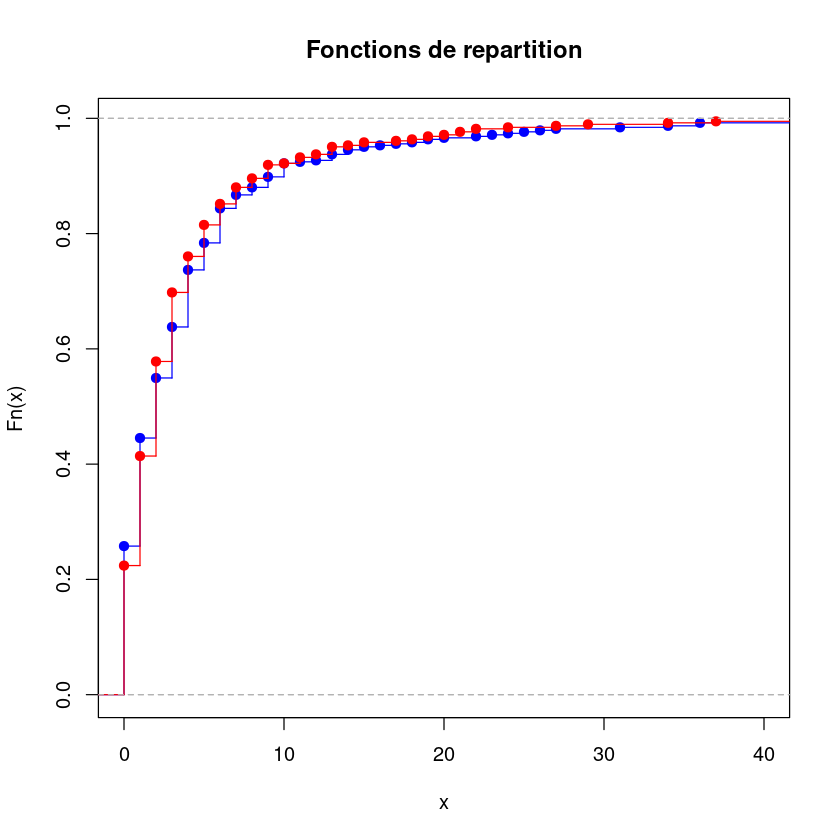

In [11]:
F_challenge <- ecdf(challengeA)
F_tauxMutation <- ecdf(TauxMutation)

plot(F_challenge, verticals = TRUE, xlim = c(0, 40), main = "Fonctions de repartition", col = "blue")

lines(F_tauxMutation, verticals = TRUE, xlim = c(0, 40), col = "red")


On a utilisé l'approche dichotomique d'une manière automatisée.

On va essayer de confirmer les résultats obtenu au moyen d'autres méthodes.

### Rétrécissement d'intervalle

In [12]:
# Définir l'ensemble de données de référence
reference_data <- scan("dataChallengeB7e-6.txt")

# Définir la fonction de coût
cost_function <- function(mu, reference_data) {
    commande <- sprintf("./atreyu_forward_simulator 10,1e7 0 %e 0.7 1 3840 | cut -d' ' -f1 > TauxMutation2.txt", mu)
    system(commande)
    generated_data <- scan("TauxMutation2.txt")
    ks_statistic <- ks.test(generated_data, reference_data)$statistic
    return(as.double(ks_statistic))
}

mu_init = median(reference_data)/1e7

pas = 1

for (i in 1:10) {
    x <- seq(log10(mu_init) - pas, log10(mu_init) + pas, by = 2*pas/20)
    y <- 10^x
    
    cost_function_values = c(1:length(y))

    for (i in 1:length(y)) {
        cost_function_values[i] = cost_function(y[i], reference_data)
    }

    mu_init = y[which.min(cost_function_values)]

    pas = pas/2
}

mu_init


Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate

Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate

Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate

[1] 7.191532e-06

### Gradient Descendant

In [13]:
reference_data <- scan("dataChallengeB7e-6.txt")

cost_function_derivee <- function(mu, reference_data, h) {
    return((cost_function(mu + h, reference_data) - cost_function(mu - h, reference_data))/(2*h))
}

# Initialiser la valeur de mu
mu <- median(reference_data)/1e7

ordre_gradient <- log10(cost_function_derivee(mu, reference_data, mu/10))

ordre_mu <- log10(mu)

# Définir les paramètres d'apprentissage
learning_rate <- 10**(-abs(round(ordre_gradient, 0)) - abs(round(ordre_mu,0)) - 1)


pas <- median(reference_data)/1e8

for (i in 1:30) {
    # Calculer le gradient de la fonction de coût par rapport à mu
    gradient <- cost_function_derivee(mu, reference_data, pas)

    # Mettre à jour la valeur de mu en fonction du gradient et du taux d'apprentissage
    if ((mu - learning_rate * gradient) > 0) {
        mu <- mu - learning_rate * gradient
    }
    else {
        mu <- 1e-7
    }
    
    # Afficher la valeur de la fonction de coût toutes les 100 itérations
    if (i %% 10 == 0) {
        cost <- cost_function(mu, reference_data)
        cat("Iteration", i, "Cost:", cost, "\n")
    }
    if (cost_function(mu, reference_data) < 0.08) {
        break
    }
}

mu

Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate

Iteration 10 Cost: 0.9713542 


Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate

Iteration 20 Cost: 0.6869792 


Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate

Iteration 30 Cost: 0.8971354 


Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”


[1] 1.686045e-05

In [674]:
inference_dichotomique_parametre <- function(N0, N1, d0, fmutant, p, sample_file) {

    echantillon <- scan(sample_file)

    mu_init <- rnorm(1, mean = median(echantillon)/N1, sd = (median(echantillon)/N1/10))
    distance_to_curve <- 1
    mouvement_gauche <- TRUE
    mouvement_droite <- TRUE
    pas <- 1.5
    counter <- 0
    cmax <- 20
    
    precision = 0.02
        
    while (distance_to_curve > 0.05) {
        mu_gauche <- max(10^(log10(mu_init) - pas), 1/N1)
        mu_droite <- 10^(log10(mu_init) + pas)
        distance_to_curve_gauche <- 0
        
        commande_gauche <- sprintf("./atreyu_forward_simulator %e,%e %e %e %e %e 384 | cut -d' ' -f1 > TauxMutation2.txt", N0, N1, d0, mu_gauche, fmutant, p)
        
        system(commande_gauche)
        TauxMutation <- scan("TauxMutation2.txt")
        test_ks <- suppressWarnings(ks.test(TauxMutation, echantillon))
        distance_to_curve_gauche <- as.double(test_ks$statistic)
        distance_to_curve_droite <- 0
        
        
        commande_droite <- sprintf("./atreyu_forward_simulator %e,%e %e %e %e %e 384 | cut -d' ' -f1 > TauxMutation2.txt", N0, N1, d0, mu_droite, fmutant, p)        
        
        system(commande_droite)
        TauxMutation <- scan("TauxMutation2.txt")        
        
        test_ks <- suppressWarnings(ks.test(TauxMutation, echantillon))
        distance_to_curve_droite <- as.double(test_ks$statistic)

        if ((distance_to_curve_droite < distance_to_curve_gauche) && (distance_to_curve_droite < distance_to_curve)) {
            mouvement_gauche <- FALSE
            if (!mouvement_droite) {
                if (pas > precision) {
                    pas <- pas/2
                }
                mouvement_droite <- TRUE
            }
            counter <- 0
            distance_to_curve <- distance_to_curve_droite
            mu_init <- mu_droite
        }
        else if ((distance_to_curve_gauche < distance_to_curve_droite) && (distance_to_curve_gauche < distance_to_curve)) {
            mouvement_droite <- FALSE
            if (!mouvement_gauche) {
                if (pas > precision) {
                    pas <- pas/2
                }
                mouvement_gauche <- TRUE
            }
            counter <- 0
            distance_to_curve <- distance_to_curve_gauche
            mu_init <- mu_gauche
        }
        else {
            mouvement_droite <- TRUE
            mouvement_gauche <- TRUE
            counter <- counter + 1
            if (pas > precision) {
                    pas <- pas/2
            }
        }
                
        if (counter > cmax) {
            break
        }
            
    }
    return (mu_init)
}

# inference_dichotomique_parametre(10, 1e7, 0, 0.7, 1,"dataChallengeB3e-6.txt")

if (False) {
    vector = c(1:500)

    for (i in 1:500) {
        vector[i] = inference_dichotomique_parametre(10, 1e7, 0, 0.7, 1,"dataChallengeB3e-6.txt")
    }

    writeLines(as.character(vector), "3e-6_inference_dichotomique.txt")
   
}

In [721]:
cost_function <- function(mu, reference_data, N0, N1, d0, fmutant, p) {
    commande <- sprintf("./atreyu_forward_simulator %e,%e %e %e %e %e 384 | cut -d' ' -f1 > TauxMutation2.txt", N0, N1, d0, mu, fmutant, p)
    system(commande)
    generated_data <- scan("TauxMutation2.txt")
    ks_statistic <- suppressWarnings(ks.test(generated_data, reference_data)$statistic)
    return(as.double(ks_statistic))
}


inference_retrec_interval <- function(N0, N1, d0, fmutant, p, sample_file, cost_function) {
    reference_data = scan(sample_file)
            
    mu_init <- rnorm(1, mean = median(reference_data)/N1, sd = (median(reference_data)/N1/10))

    pas = 1
    
    cost <- 1
    
    tour <- 0 
    
    while (cost > 0.05) {
        x <- seq(log10(mu_init) - pas, log10(mu_init) + pas, by = 2*pas/10)
        y <- 10^x

        cost_function_values = c(1:length(y))

        for (i in 1:length(y)) {
            cost_function_values[i] = cost_function(y[i], reference_data, N0, N1, d0, fmutant, p)
        }

        mu_init = y[which.min(cost_function_values)]
        
        cost = min(cost_function_values)
        
        pas = pas/2
        
        tour <- tour + 1
        if (tour >= 10) {
            break
        }
    }
    
    return(mu_init)
}

result <- inference_retrec_interval(10, 1e7, 0, 0.7, 1, "dataChallengeB5e-7.txt", cost_function)

vector = c(1:500)

for (i in 1:500) {
    vector[i] = inference_retrec_interval(10, 1e7, 0, 0.7, 1,"dataChallengeB3e-6.txt", cost_function)
}

writeLines(as.character(vector), "3e-6_inference_retrec_intervalle.txt")

In [196]:
cost_function_derivee <- function(mu, reference_data, h, cost_function, N0, N1, d0, fmutant, p) {
    return((cost_function(mu + h, reference_data, N0, N1, d0, fmutant, p) - cost_function(mu - h, reference_data, N0, N1, d0, fmutant, p))/(2*h))
}


inference_gradient_decent <- function(N0, N1, d0, fmutant, p, sample_file, cost_function, cost_function_derivee) {
    reference_data <- scan(sample_file)
    # Initialiser la valeur de mu
    mu <- median(reference_data)/N1
    
    ordre_gradient <- log10(abs(cost_function_derivee(mu, reference_data, mu/10, cost_function, N0, N1, d0, fmutant, p)))

    ordre_mu <- log10(mu)
    
    # Définir les paramètres d'apprentissage
    learning_rate <- 10**(-abs(round(ordre_gradient, 0)) - abs(round(ordre_mu,0)) - 1.5)
    
    pas <- (median(reference_data)/N1)/10
    
    cost = 1
    
    runner_up = c(1:2)
    runner_up[1] = mu
    runner_up[2] = cost_function(mu, reference_data, N0, N1, d0, fmutant, p)
    
    counter = 0
    
    while (cost > 0.05) {
        # Calculer le gradient de la fonction de coût par rapport à mu
        gradient <- cost_function_derivee(mu, reference_data, pas, cost_function, N0, N1, d0, fmutant, p)
                
        # Mettre à jour la valeur de mu en fonction du gradient et du taux d'apprentissage
        if ((mu - learning_rate * gradient) > 0) {
            mu <- mu - learning_rate * gradient
        }
        pas = mu/10

        cost <- cost_function(mu, reference_data, N0, N1, d0, fmutant, p)
        if (cost < runner_up[2]) {
            runner_up[1] = mu
            runner_up[2] = cost
        }
        counter <- counter + 1
        
        if (counter == 30) {
            break
        }
    }
    
    return(runner_up[1])
}

print(inference_gradient_decent(10, 1e7, 0, 0.7, 1, "datachallengeA", cost_function, cost_function_derivee))


[1] 1.506133e-07


In [656]:
cost_function_derivee_log <- function(mu, reference_data, h, cost_function, N0, N1, d0, fmutant, p) {
    return((cost_function(10^(log10(mu) + h), reference_data, N0, N1, d0, fmutant, p) - cost_function(10^(log10(mu) - h), reference_data, N0, N1, d0, fmutant, p))/(2*h))
}


inference_gradient_decent_log <- function(N0, N1, d0, fmutant, p, sample_file, cost_function, cost_function_derivee_log) {
    reference_data <- scan(sample_file)
    # Initialiser la valeur de mu
    mu <- median(reference_data)/N1
    
    # ordre_gradient <- log10(abs(cost_function_derivee_log(mu, reference_data, 0.1, cost_function, N0, N1, d0, fmutant, p)))
    
    # ordre_mu <- log10(mu)
    
    # Définir les paramètres d'apprentissage
    #learning_rate <- 10**(-abs(round(ordre_gradient, 0)) - abs(round(ordre_mu,0)) - 1.5)
    learning_rate <- 1/N1
    
    pas <- 0.2
    
    cost = 1
    
    runner_up = c(1:2)
    runner_up[1] = mu
    runner_up[2] = cost_function(mu, reference_data, N0, N1, d0, fmutant, p)
    
    counter = 0
    
    while (cost > 0.05) {
        # Calculer le gradient de la fonction de coût par rapport à mu
        gradient <- cost_function_derivee_log(mu, reference_data, pas, cost_function, N0, N1, d0, fmutant, p)
                
        # Mettre à jour la valeur de mu en fonction du gradient et du taux d'apprentissage
        if ((mu - learning_rate * gradient) > 0) {
            mu <- 10^(log10(mu) - 0.1*gradient)
        }
        
        # pas = mu/10

        cost <- cost_function(mu, reference_data, N0, N1, d0, fmutant, p)
        if (cost < runner_up[2]) {
            runner_up[1] = mu
            runner_up[2] = cost
        }
        counter <- counter + 1
        
        if (counter == 30) {
            break
        }
    }
    
    return(runner_up[1])
}

inference_gradient_decent_log(10, 1e7, 0, 0.7, 1, "dataChallengeB3e-6.txt", cost_function, cost_function_derivee_log)


reference_data <- scan("datachallengeA")

[1] 3.019849e-06

In [187]:
jeu_donnees_parameters = scan("Jeux_Donnees_Parameters.txt")

jeu_donnees_parameters_matrix = matrix(jeu_donnees_parameters, ncol = 5, byrow = TRUE)

files = file("Jeux_Donnees_Files.txt", "r") 

jeu_donnees_files <- scan(files, what = "character", sep = "\n")

erreur_quadratique_retrec_interval = 0

number_of_tests = 100

duration_retrec_interval <- system.time(
    for (i in 1:number_of_tests) {
        parameters = jeu_donnees_parameters_matrix[i,]

        result = inference_retrec_interval(parameters[1], parameters[2], parameters[3], parameters[5], 1, jeu_donnees_files[i], cost_function)

        erreur_quadratique_retrec_interval = erreur_quadratique_retrec_interval + (result - parameters[4])*(result - parameters[4])/parameters[4]/parameters[4]

    }
)

erreur_quadratique_retrec_interval = sqrt(erreur_quadratique_retrec_interval)/number_of_tests

erreur_quadratique_dichotomie = 0

duration_dichotomie <- system.time(
    for (i in 1:number_of_tests) {
        parameters = jeu_donnees_parameters_matrix[i,]

        result = inference_dichotomique_parametre(parameters[1], parameters[2], parameters[3], parameters[5], 1, jeu_donnees_files[i])

        erreur_quadratique_dichotomie = erreur_quadratique_dichotomie + (result - parameters[4])*(result - parameters[4])/parameters[4]/parameters[4]

    }
)

erreur_quadratique_dichotomie = sqrt(erreur_quadratique_dichotomie)/number_of_tests



ERROR: Error in ks.test(generated_data, reference_data): not enough 'x' data


Timing stopped at: 3.263 0.567 3.235



In [ ]:
erreur_quadratique_grad_decent = 0


duration_grad_decent <- system.time(
    for (i in 1:number_of_tests) {
        parameters = jeu_donnees_parameters_matrix[i,]

        result = inference_gradient_decent(parameters[1], parameters[2], parameters[3], parameters[5], 1, jeu_donnees_files[i], cost_function, cost_function_derivee)

        erreur_quadratique_grad_decent = erreur_quadratique_grad_decent + (result - parameters[4])*(result - parameters[4])/parameters[4]/parameters[4]

    }
)

erreur_quadratique_grad_decent = sqrt(erreur_quadratique_grad_decent)/number_of_tests

In [18]:
library(ggplot2)

eqm = c(erreur_quadratique_dichotomie, erreur_quadratique_retrec_interval, erreur_quadratique_grad_decent)
time = c(as.double(duration_dichotomie[1]) + as.double(duration_dichotomie[4]), as.double(duration_retrec_interval[1]) + as.double(duration_retrec_interval[4]), as.double(duration_grad_decent[1]) + as.double(duration_grad_decent[4]))
method <- c("Dichotomie", "Retrec Interval", "Gradient Decent")

# Plot of accuracy
p1 <- ggplot(data.frame(method, eqm), aes(x=method, y=eqm)) +
  geom_bar(stat="identity", fill="blue") +
  labs(title="Error of Methods", y="Error")

# Plot of execution time
p2 <- ggplot(data.frame(method, time), aes(x=method, y=time)) +
  geom_bar(stat="identity", fill="red") +
  labs(title="Execution Time of Methods", y="Execution Time (seconds)")

p1
p2


ERROR: Error in eval(expr, envir, enclos): object 'erreur_quadratique_dichotomie' not found


In [21]:
library(vioplot)

number_of_tests = 50

squared_error_dichotomy = c(1:number_of_tests)
squared_error_grad_decent = c(1:number_of_tests)
squared_error_retrec_interval = c(1:number_of_tests)
execution_time_dichotomy = c(1:number_of_tests)
execution_time_grad_decent = c(1:number_of_tests)
execution_time_retrec_interval = c(1:number_of_tests)


for (i in 1:number_of_tests) {
    parameters = jeu_donnees_parameters_matrix[i,]
    
    duration_dichotomie <- system.time({
        result = inference_dichotomique_parametre(parameters[1], parameters[2], parameters[3], parameters[5], 1, jeu_donnees_files[i])
    })
    squared_error_dichotomy[i] = (result - parameters[4])*(result - parameters[4])/parameters[4]/parameters[4]
    execution_time_dichotomy[i] = as.double(duration_dichotomie[1]) + as.double(duration_dichotomie[4])
    
    duration_grad_decent <- system.time({
        result = inference_gradient_decent(parameters[1], parameters[2], parameters[3], parameters[5], 1, jeu_donnees_files[i], cost_function, cost_function_derivee)
    })
    squared_error_grad_decent[i] = (result - parameters[4])*(result - parameters[4])/parameters[4]/parameters[4]
    execution_time_grad_decent[i] = as.double(duration_grad_decent[1]) + as.double(duration_grad_decent[4])
    
    duration_retrec_interval <- system.time({
        result <- inference_retrec_interval(parameters[1], parameters[2], parameters[3], parameters[5], 1, jeu_donnees_files[i], cost_function)
    })
    squared_error_retrec_interval[i] = (result - parameters[4])*(result - parameters[4])/parameters[4]/parameters[4]
    execution_time_retrec_interval[i] = as.double(duration_retrec_interval[1]) + as.double(duration_retrec_interval[4])
}

violin_plot <- function(names , vecteurs, separateur){
    data <- data.frame(
        group = rep(names, each = separateur),
        value = vecteurs
    )
    vioplot(data$value ~ data$group, col = "blue")
}


Loading required package: sm

Package 'sm', version 2.2-5.7: type help(sm) for summary information


Attaching package: ‘sm’


The following object is masked from ‘package:MASS’:

    muscle


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Timing stopped at: 0.07 0.016 0.072



In [ ]:
violin_plot(c("Dichotomie", "Grad decent", "Retrec Intervalle"), c(squared_error_dichotomy, squared_error_grad_decent, squared_error_retrec_interval), number_of_tests)

violin_plot(c("Dichotomie", "Grad decent", "Retrec Intervalle"), c(execution_time_dichotomy, execution_time_grad_decent, execution_time_retrec_interval), number_of_tests)

# ABC : Approximate Bayesian Computation

Supposons que nous voulions calculer la distribution de probabilité postérieure d'un paramètre univarié ou multivarié, θ. Une valeur de paramètre θi , est échantillonnée à partir de sa distribution antérieure pour simuler un ensemble de données yi ,
pour i = 1, . . . n, où n est le nombre de simulations. Un ensemble de statistiques sommaires S(yi) est calculé
à partir des données simulées et comparées aux statistiques sommaires obtenues à partir des données réelles S(y0) Une valeur de paramètre θi , est échantillonnée à partir de sa distribution antérieure pour simuler un ensemble de données yi ,
pour i = 1, . . . n, où n est le nombre de simulations. Un ensemble de statistiques sommaires S(yi) est calculé
à partir des données simulées et comparées aux statistiques sommaires obtenues à partir des données réelles S(y0) à l'aide d'une mesure de distance d.
à l'aide d'une mesure de distance d.
Si d(S(yi), S(y0)) (c'est-à-dire la distance entre S(yi) et S(y0)) est inférieure à un seuil donné, le paramètre
paramètre θi est acceptée. Les θi acceptés
acceptés forment un échantillon d'une approximation de la distribution postérieure.

### Inférence du taux de mutation $\mu$

On commence par l'importation du library abc, puis on charge les données observées dans reference_data.

In [ ]:
library(abc)
reference_data <- scan("dataChallengeB3e-6.txt")


On prépare les différentes variables nécessaires à notre simulateur.

In [ ]:
mu_median <- median(reference_data)/1e7
N0 = 10
N1 = 1e7
d0 = 0
fmutant = 0.7

# D'autres paramètres pour la préparation des données à donner à 
# la fonction abc() :

filter = 10*median(reference_data)
tol = 0.1
n_sim = 1000
n_param = 1


On choisit un loi non informatif (loi uniforme) pour notre prior :

In [ ]:
prior <- function(n) runif(n, 10^(log10(mu_median) - 1), 10^(log10(mu_median) + 1))

On définit la fonction modele, on choisit le mean comme un statistique sommaire:

In [ ]:
modele <- function(mu) {
    commande <- sprintf("./atreyu_forward_simulator %e,%e %e %e %e 1 384 > TauxMutation.txt ; cut -d' ' -f1 TauxMutation.txt > TauxMutation2.txt", N0, N1, d0, mu, fmutant)
    system(commande)
    generated_data <- scan("TauxMutation2.txt")
    return (mean(generated_data[generated_data<filter]))
}

On simule n_sim valeurs de $\mu$ à l'aide de notre prior, et on calcule après les statistiques sommaires associées :

In [ ]:
param <- matrix(prior(n_sim * n_param), ncol = n_param)
sumstat <- matrix(apply(param, 1, modele), ncol = 1)

#### Cross Validation :

Avant de passer à l'étape de l'inférence, nous évaluons d'abord si l'ABC est capable d'estimer le paramètre mu. Nous utilisons la fonction cv4abc pour déterminer la précision de l'ABC et la sensibilité des estimations au taux de tolérance. Le code suivant évalue la précision des estimations de mu sous trois taux de tolérance en utilisant la méthode de rejet et de régression linéaire.

In [ ]:
cv.res.rej <- cv4abc(param,sumstat,nval=10,tols=c(.005,.01,.05),statistic ="mean" ,method = "rejection")
cv.res.reg <- cv4abc(param,sumstat,nval=10,tols=c(.005,.01,.05),statistic = "mean" ,method = "loclinear")
summary(cv.res.rej)
summary(cv.res.reg)
par(mfrow=c(1,2), mar=c(5,3,4,.5), cex=.8)
plot(cv.res.rej, caption="Rejection")
plot(cv.res.reg, caption="Local linear regression")

les graphiques montrent les means de la distribution a posteriori de $\mu$ pour chaque échantillon de cross validation.
Les points du graphique de cross validation sont dispersés autour de la ligne d'identité, ce qui indique que $\mu$ peut être bien estimé à l'aide des notre statistiques sommaires (le mean dans notre cas). En outre, les estimations n'étaient pas seulement précises pour $\mu$ , mais aussi insensibles au taux de tolérance. En conséquence, l'erreur de prédiction est relativement faible et indépendante du taux de tolérance.

#### L'inférence de $\mu$:

On utilise la fonction abc, avec la méthode loclinear : 

In [ ]:
abc_out <- abc(target = mean(reference_data[reference_data<filter]), param = param, sumstat = sumstat, method = "loclinear", tol = tol)


On affiche le résumé de résultats :

In [ ]:
summary(abc_out)

##### Quelques graphiques :

In [ ]:
hist(abc_out, breaks=30, caption=expression(mu))
plot(abc_out, param=param)

par(mfcol = c(1,3), mar=c(5,3,4,.5))
boxplot(abc_out$adj.values, main="Estimations acceptées")

l’espérance conditionnelle $E[θ|y]$ est le prédicteur optimal du paramètre mu au sens des moindres carrés.

In [ ]:
mean(abc_out$adj.values)


### Inférence du paramétre du fitness f

Comme dans la partie précédente, nous pouvons simuler ce paramètre à l'aide du code suivant :

In [ ]:
# La valeur réelle de f est 0.7.
reference_data <- scan("dataChallengeB1e-6.txt")

N0 = 10
N1 = 1e7
d0 = 0
mu = 1e-6

filter = 10*median(reference_data)

tol = 0.05
n_sim = 5000
n_param = 1

prior <- function(n) runif(n, 0,1)

modele <- function(fmutant) {
    commande <- sprintf("./atreyu_forward_simulator %e,%e %e %e %e 1 384 > TauxMutation.txt ; cut -d' ' -f1 TauxMutation.txt > TauxMutation2.txt", N0, N1, d0, mu, fmutant)
    system(commande)
    generated_data <- scan("TauxMutation2.txt")
    return (mean(generated_data[generated_data<filter]))
}


param <- matrix(prior(n_sim * n_param), ncol = n_param)
sumstat <- matrix(apply(param, 1, modele), ncol = 1)
abc_out <- abc(target = mean(reference_data[reference_data<filter]), param = param, sumstat = sumstat,  tol = tol,method = "loclinear", transf = "log")



# afficher les résultats
summary(abc_out)

# plot des résultats
hist(abc_out, breaks=30, caption=expression(mu))
plot(abc_out, param=param)

par(mfcol = c(1,3), mar=c(5,3,4,.5))
boxplot(abc_out$adj.values, main="Estimations acceptées")

# l’espérance conditionnelle E[θ|y] est le prédicteur optimal du paramètre mu au sens des moindres carrés.
print("L'estimation de notre paramètre :")
mean(abc_out$adj.values)

### Inférence du paramétre (f, $\mu$) 

Maintenant on va essayer de faire l'inférence des deux paramètres à la fois.

**1er idée** : On travaille avec une seule statistique qui est la moyenne :


In [ ]:

reference_data <- scan("dataChallengeB1e-7.txt")

mu_median <- median(reference_data)/1e7

N0 = 10
N1 = 1e7
d0 = 0

filter = 10*median(reference_data)

tol = 0.05
n_sim = 5000
n_param = 2

prior1 <- function(n) runif(n, 10^(log10(mu_median) - 1), 10^(log10(mu_median) + 1))
prior2 <- function(n) runif(n,0,1)

modele <- function(params) {
  mu <- params[1]
  fmutant <- params[2]
  commande <- sprintf("./atreyu_forward_simulator %e,%e %e %e %e 1 384 > TauxMutation.txt ; cut -d' ' -f1 TauxMutation.txt > TauxMutation2.txt", N0, N1, d0, mu, fmutant)
  system(commande)
  generated_data <- scan("TauxMutation2.txt")
  return (c(mean(generated_data[generated_data<filter])))
}


param <- matrix(c(prior1(n_sim),prior2(n_sim)), ncol = n_param)
sumstat <- matrix(apply(param, 1, modele), ncol = 1)


cv.res.rej <- cv4abc(param,sumstat,nval=10,tols=c(.005,.01,.05),statistic ="mean" ,method = "rejection")
cv.res.reg <- cv4abc(param,sumstat,nval=10,tols=c(.005,.01,.05),statistic = "mean" ,method = "loclinear")
summary(cv.res.rej)
summary(cv.res.reg)
par(mfrow=c(1,2), mar=c(5,3,4,.5), cex=.8)
plot(cv.res.rej, caption="Rejection")
plot(cv.res.reg, caption="Local linear regression")

Les points du graphique de cross validation ne sont pas dispersés autour de la ligne d'identité pour le paramètre f, ce qui indique que f ne peut être bien estimé à l'aide des nos statistiques sommaires (le mean dans notre cas).
Les points du graphique pour le 1er paramètre sont un peu bien dispersés autour de la ligne d'identité. Cela veut dire qu'à l'aide de nos statistiques sommaires, on va avoir une estimation plus ou moins bien pour le 1er paramètre $\mu$, mais pas pour le 2éme :

In [ ]:
abc_out <- abc(target = c(median(reference_data[reference_data<filter])), param = param, sumstat = sumstat, tol = tol ,method = "loclinear",transf = c("none","log"))

# l’espérance conditionnelle E[θ|y] est le prédicteur optimal du paramètre mu au sens des moindres carrés.
print("L'estimation de notre 1er paramètre :")
mean(abc_out$adj.values[,1])
print("L'estimation de notre 2eme paramètre :")
mean(abc_out$adj.values[,2])

**2ème idée** : Est ce que si on augmente le nombre de statistiques, on va avoir des bon résultats ?

On va essayer d'ajouter une autre statistique de variabilité qui est la variance :

In [ ]:
reference_data <- scan("dataChallengeB1e-7.txt")

mu_median <- median(reference_data)/1e7

N0 = 10
N1 = 1e7
d0 = 0

filter = 10*median(reference_data)

tol = 0.05
n_sim = 5000
n_param = 2

prior1 <- function(n) runif(n, 10^(log10(mu_median) - 1), 10^(log10(mu_median) + 1))
prior2 <- function(n) runif(n,0,1)

modele <- function(params) {
  mu <- params[1]
  fmutant <- params[2]
  commande <- sprintf("./atreyu_forward_simulator %e,%e %e %e %e 1 384 > TauxMutation.txt ; cut -d' ' -f1 TauxMutation.txt > TauxMutation2.txt", N0, N1, d0, mu, fmutant)
  system(commande)
  generated_data <- scan("TauxMutation2.txt")
  return (c(mean(generated_data[generated_data<filter]),sd(generated_data[generated_data<filter])))
  
}


param <- matrix(c(prior1(n_sim),prior2(n_sim)), ncol = n_param)
sumstat <- matrix(apply(param, 1, modele), ncol = 2)


cv.res.rej <- cv4abc(param,sumstat,nval=10,tols=c(.005,.01,.05),statistic ="mean" ,method = "rejection")
cv.res.reg <- cv4abc(param,sumstat,nval=10,tols=c(.005,.01,.05),statistic = "mean" ,method = "loclinear")
summary(cv.res.rej)
summary(cv.res.reg)
par(mfrow=c(1,2), mar=c(5,3,4,.5), cex=.8)
plot(cv.res.rej, caption="Rejection")
plot(cv.res.reg, caption="Local linear regression")

On remarque que les résultats sont beaucoup plus pires que la première idée, et on ne peut pas estimer aucun des deux paramètres. En fait on avait essayé de faire plusieurs types de statistiques mais on n'a pas obtenu des bons résultats. le problème devient très difficile puisqu'il faut choisir les bons statistiques informatifs (qui tendent vers l’exhaustivité).

### Metropolis Hasting

In [724]:
cost_function_1 <- function(N0, N1, d0, fmutant, reference_data, mu, p) {
    l <- c()
    for (i in 1:10){
      commande <- sprintf("./atreyu_forward_simulator %e,%e %e %e %e %e 384 | cut -d' ' -f1 > TauxMutation2.txt", N0, N1, d0, mu, fmutant, p)
      system(commande)
      generated_data <- scan("TauxMutation2.txt")
      ks_statistic <- suppressWarnings(ks.test(generated_data, reference_data)$statistic)
      l <- c(l, (1/as.double(ks_statistic)))
    }
    return(mean(l))
}

inference_metropolis_hasting <- function(N0, N1, d0, fmutant, p, sample_file) {
    
    reference_data = scan(sample_file)

    mu  = median(reference_data) / N1
    cost_function_mu = cost_function_1(N0, N1, d0, fmutant, reference_data, mu, p)
    les_mu <- c()
    proposal = function(mu, sdd){
      x =  rnorm(1,mean = 1, sd = sdd)
      if (x < 0){
        x = -x
      }
      les_mu <- c(les_mu, mu*x)

      return  ( mu * x)
    }

    chain <- c()
    liste_mu_star <- c()
    n_iter = 20
    list_v <- c()
    variances <- c(1,10,30,40 )
    for (i in 1:n_iter) {
        variance <- sample(variances)[1]
        list_v <- c(list_v, variance)

        mu_star <- proposal(mu, variance)

        liste_mu_star <- c(liste_mu_star, mu_star)
        cost_function_mu_star <- cost_function_1(N0, N1, d0, fmutant, reference_data, mu_star, p)
        quotient <- cost_function_mu_star / cost_function_mu
        r <- min(1,quotient)
        v =  runif(n = 1)
        if (quotient > 1) {
          mu = mu_star
          cost_function_mu = cost_function_mu_star
        }

        chain <- c(chain, mu)
    }

    variances <- c(0.1,0.5, 0.01)
    mu_fix <- mean(chain[(n_iter-10):n_iter])
    proposal_2 <- function(mo, sdd){
       x =  rnorm(1,mean = mo, sd = sdd)
      if (x < 0){
        x = -x
      }
       return (x)
    }
    for (i in 1:20) {
        variance <- sample(variances)[1]
        list_v <- c(list_v, variance)

        mu_star <- proposal_2(mu_fix, variance*mu_fix)

        liste_mu_star <- c(liste_mu_star, mu_star)
        cost_function_mu_star <- cost_function_1(N0, N1, d0, fmutant, reference_data, mu_star, p)
        quotient <- cost_function_mu_star / cost_function_mu
        r <- min(1,quotient)
        v =  runif(n = 1)
        if (quotient > 1) {
          mu = mu_star
          cost_function_mu = cost_function_mu_star
        }

        chain <- c(chain, mu)
    }
    
    return (chain[length(chain)])
}

print(inference_metropolis_hasting(10, 1e7, 0, 0.7, 1, "dataChallengeB1e-5.txt"))

if (FALSE) {
    vector = c(1:100)

    for (i in 1:100) {
        vector[i] = inference_metropolis_hasting(10, 1e7, 0, 0.7, 1,"dataChallengeB3e-6.txt")
    }

    writeLines(as.character(vector), "3e-6_inference_metropolis_hasting.txt")
}

[1] 1.18252e-05


### Prolongement rétrécissement d'intervalles en 2D

In [4]:
cost_function <- function(mu, reference_data, N0, N1, d0, fmutant, p) {
    commande <- sprintf("./atreyu_forward_simulator %e,%e %e %e %e %e 384 | cut -d' ' -f1 > TauxMutation2.txt", N0, N1, d0, mu, fmutant, p)
    system(commande)
    generated_data <- scan("TauxMutation2.txt")
    ks_statistic <- ks.test(generated_data, reference_data)$statistic
    return(as.double(ks_statistic))
}

inference_retrec_interval_2d <- function(N0, N1, d0, p, sample_file, cost_function) {
    reference_data = scan(sample_file)
                
    mu_init = median(reference_data)/N1
    fmutant_init = 1
    
    
    pas_mu = 1
    pas_fmutant = 0.35
    
    cost <- 1
    
    x <- 0
    y <- 0
    z <- 0

    for (j in 1:1) {
        x <- seq(log10(mu_init) - pas_mu, log10(mu_init) + pas_mu, by = 2*pas_mu/10)
        y1 <- 10^x
        x2 <- seq(log10(fmutant_init) - pas_fmutant, log10(fmutant_init) + pas_fmutant, by = 2*pas_fmutant/10)
        y2 <- 10^x2
                
        matrice_parametres = expand.grid(y1, y2)
                
        cost_function_values  = c(1:length(matrice_parametres[, 1]))
        
        x <- c(1:length(matrice_parametres[, 1]))
        y <- c(1:length(matrice_parametres[, 1]))
        z <- c(1:length(matrice_parametres[, 1]))
        
        for (i in 1:length(matrice_parametres[, 1])) {
            cost_function_values[i] = cost_function(matrice_parametres[i, 1], reference_data, N0, N1, d0, matrice_parametres[i, 2], p)
            x[i] = matrice_parametres[i, 1]
            y[i] = matrice_parametres[i, 2]
            z[i] = cost_function_values[i]
        }
                
        indice_min = which.min(cost_function_values)
                
        mu_init = matrice_parametres[indice_min, 1]
        fmutant_init = matrice_parametres[indice_min, 2]
        
        cost <- min(cost_function_values)
        
        print(cost)
        print(c(mu_init, fmutant_init))
        pas_mu = max(pas_mu/2, 0.1)
        if ((pas_fmutant > 0.1) && cost < 0.4 ) {
              pas_fmutant = pas_fmutant/2
        }
    }
    
    return(list(mu_init, fmutant_init, x, y, z))
}

vector <- inference_retrec_interval_2d(10, 1e7, 0, 1, "datachallengeA", cost_function)

Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate

Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate in the presence of ties”
Warning message in ks.test(generated_data, reference_data):
“p-value will be approximate

[1] 0.07291667
[1] 1.261915e-07 1.000000e+00


In [615]:
gradient_mu_fmutant <- function(mu, reference_data, h1, h2, cost_function, N0, N1, d0, fmutant, p) {
    return (c((cost_function(10^(log10(mu) + h1), reference_data, N0, N1, d0, fmutant, p) - cost_function(10^(log10(mu) - h1), reference_data, N0, N1, d0, fmutant, p))/(2*h1), (cost_function(mu, reference_data, N0, N1, d0, 10^(log10(fmutant) + h2), p) - cost_function(mu, reference_data, N0, N1, d0, 10^(log10(fmutant) - h2), p))/(2*h2)))
}


inference_gradient_decent_2d <- function(N0, N1, d0, p, sample_file, cost_function, cost_function_derivee_log) {
    reference_data <- scan(sample_file)

    mu <- median(reference_data)/N1
    fmutant <- 1
    
    pas_mu <- 0.1
    pas_fmutant <- 0.2
    
    cost = 1
    
    runner_up = c(1:3)
    runner_up[1] = mu
    runner_up[2] = fmutant
    runner_up[3] = cost_function(mu, reference_data, N0, N1, d0, fmutant, p)
    
    counter = 0
    
    while (cost > 0.05) {
        # Calculer le gradient de la fonction de coût par rapport à mu
        gradient_value <- gradient_mu_fmutant(mu, reference_data, pas_mu, pas_fmutant, cost_function, N0, N1, d0, fmutant, p)
                
        # Mettre à jour la valeur de mu en fonction du gradient et du taux d'apprentissage
        mu <- 10^(log10(mu) - 0.1*gradient_value[1])
        fmutant <- 10^(log10(fmutant) - 0.1*gradient_value[2])
        
        cost <- cost_function(mu, reference_data, N0, N1, d0, fmutant, p)
        if (cost < runner_up[3]) {
            runner_up[1] = mu
            runner_up[2] = fmutant
            runner_up[3] = cost
        }
        counter <- counter + 1
        
        if (counter == 30) {
            break
        }
    }
    return(c(runner_up[1], runner_up[2]))
}

inference_gradient_decent_2d(10, 1e7, 0, 1, "datachallengeA", cost_function, gradient_mu_fmutant)

[1] 1.346341e-07 8.278826e-01

In [5]:
library(rgl)

x <- unlist(vector[3])
y <- unlist(vector[4])
z <- unlist(vector[5])

plot3d(x, y, z, type = "n")


Warning message in par3d(userMatrix = structure(c(1, 0, 0, 0, 0, 0.342020143325668, :
“font family "sans" not found, using "bitmap"”


### Estimation valeur fitness test

In [ ]:
cost_function <- function(mu, reference_data, N0, N1, d0, fmutant, p) {
    commande <- sprintf("./atreyu_forward_simulator %e,%e %e %e %e %e 3840 | cut -d' ' -f1 > TauxMutation2.txt", N0, N1, d0, mu, fmutant, p)
    system(commande)
    generated_data <- scan("TauxMutation2.txt")
    ks_statistic <- ks.test(generated_data, reference_data)$statistic
    return(as.double(ks_statistic))
}


inference_retrec_interval_fmutant <- function(N0, N1, d0, mu, p, sample_file, cost_function) {
    reference_data = scan(sample_file)
            
    fmutant_init = 1

    pas_fmutant = 0.4
    
    cost = 1
    tours = 0

    while (cost > 0.04) {
        
        tours <- tours + 1
        
        x <- seq(log10(fmutant_init) - pas, log10(fmutant_init) + pas, by = 2*pas_fmutant/10)
        
        y <- 10^x

        cost_function_values = c(1:length(y))

        for (i in 1:length(y)) {
            cost_function_values[i] = cost_function(mu, reference_data, N0, N1, d0, y[i], p)
        }

        fmutant_init = y[which.min(cost_function_values)]
        
        cost <- min(cost_function_values)
        
        if (pas_fmutant >= 0.1 && min(cost_function_values) < 0.4) {
            pas_fmutant = pas_fmutant/2
        }
        
        if (tours >= 20) {
            break
        }
    }
    
    return(fmutant_init)
}


print(inference_retrec_interval_fmutant(10, 1e7, 0, 8e-7, 1, "dataChallengeC_mu8e-7_fit3e-1.txt", cost_function))

In [45]:
dataChallenge2 <- readLines("./challenges/challenge2.data")
fitnessChallenge2 <- readLines("./challenges/challenge2.f")
deathChallenge2 <- readLines("./challenges/challenge2.d")
samplingChallenge2 <- readLines("./challenges/challenge2.p")
populationChallenge2 <- readLines("./challenges/challenge2.N")

output <- "./challenges/challenge2.mrate"

mrate_vector <- c(1:length(dataChallenge2))

if (FALSE) {    
    for (i in 1:length(dataChallenge2)) {
        data <- scan(text = dataChallenge2[i], sep = ",")
        sample_file <- writeLines(as.character(data), "temporary.txt")
        fmutant <- as.double(fitnessChallenge2[i])
        d0 <- as.double(deathChallenge2[i])
        p <- as.double(samplingChallenge2[i])
        N <- as.double(populationChallenge2[i])

        mu_infere <- inference_dichotomique_parametre(10, N, d0, fmutant, p, "temporary.txt")
        print(mu_infere)
        mrate_vector[i] <- mu_infere 
    }

    writeLines(as.character(mrate_vector), output, append = TRUE)
}



In [64]:
data <- scan(text = dataChallenge2[3], sep = ",")
sample_file <- writeLines(as.character(data), "temporary.txt")
fmutant <- as.double(fitnessChallenge2[3])
d0 <- as.double(deathChallenge2[3])
p <- as.double(samplingChallenge2[3])
N <- as.double(populationChallenge2[3])

mu_infere <- inference_dichotomique_parametre(10, N, d0, fmutant, p, "temporary.txt")
print(mu_infere)

[1] 0.04947917
[1] 8.007505e-08


In [ ]:
output2 <- "./challenges/challenge2_retrec_intervalle.mrate"

mrate_vector2 <- c(1:length(dataChallenge2))

if (TRUE) {    
    for (i in 1:length(dataChallenge2)) {
        data <- scan(text = dataChallenge2[i], sep = ",")
        sample_file <- writeLines(as.character(data), "temporary.txt")
        fmutant <- as.double(fitnessChallenge2[i])
        d0 <- as.double(deathChallenge2[i])
        p <- as.double(samplingChallenge2[i])
        N <- as.double(populationChallenge2[i])

        mu_infere <- inference_retrec_interval(10, N, d0, fmutant, p, "temporary.txt", cost_function)
        print(mu_infere)
        mrate_vector2[i] <- mu_infere 
    }

    writeLines(as.character(mrate_vector2), output2)
}


In [723]:
inference_abc <- function(N0,N1,d0,fmutant,p,sample_file) {
    library(abc)
    reference_data <- scan(sample_file,quiet=TRUE)

    mu_median <- median(reference_data)/N1

    filter = 10*median(reference_data)

    tol = 0.1
    n_sim = 1000
    n_param = 1

    prior <- function(n) runif(n, 10^(log10(mu_median) - 1), 10^(log10(mu_median) + 1))

    modele <- function(mu) {
        commande <- sprintf("./atreyu_forward_simulator %e,%e %e %e %e %e 384 > TauxMutation.txt ; cut -d' ' -f1 TauxMutation.txt > TauxMutation2.txt", N0, N1, d0, mu, fmutant, p)
        system(commande)
        generated_data <- scan("TauxMutation2.txt")
        return (mean(generated_data[generated_data<filter]))
    }

    param <- matrix(prior(n_sim * n_param), ncol = n_param)
    sumstat <- matrix(apply(param, 1, modele), ncol = 1)

    abc_out <- suppressWarnings(abc(target = mean(reference_data[reference_data<filter]), param = param, sumstat = sumstat, method = "loclinear", tol = tol))

    return(mean(abc_out$adj.values))
}

inference_abc(10, 1e7, 0, 0.7, 1, "datachallengeA")



[1] 1.49665e-07

In [725]:
number_of_tests = 50

squared_error_dichotomy = c(1:number_of_tests)
squared_error_grad_decent = c(1:number_of_tests)
squared_error_retrec_interval = c(1:number_of_tests)
squared_error_metropolis_hasting = c(1:number_of_tests)
squared_error_abc = c(1:number_of_tests)
execution_time_dichotomy = c(1:number_of_tests)
execution_time_grad_decent = c(1:number_of_tests)
execution_time_retrec_interval = c(1:number_of_tests)
execution_time_metropolis_hasting = c(1:number_of_tests)
execution_time_abc = c(1:number_of_tests)

for (i in 1:number_of_tests) {
    parameters = jeu_donnees_parameters_matrix[i,]
    
    duration_dichotomie <- system.time({
        result = inference_dichotomique_parametre(parameters[1], parameters[2], parameters[3], parameters[5], 1, jeu_donnees_files[i])
    })
    squared_error_dichotomy[i] = (result - parameters[4])*(result - parameters[4])/parameters[4]/parameters[4]
    execution_time_dichotomy[i] = as.double(duration_dichotomie[1]) + as.double(duration_dichotomie[4])
    
    duration_grad_decent <- system.time({
        result = inference_gradient_decent_log(parameters[1], parameters[2], parameters[3], parameters[5], 1, jeu_donnees_files[i], cost_function, cost_function_derivee_log)
    })
    squared_error_grad_decent[i] = (result - parameters[4])*(result - parameters[4])/parameters[4]/parameters[4]
    execution_time_grad_decent[i] = as.double(duration_grad_decent[1]) + as.double(duration_grad_decent[4])
    
    duration_retrec_interval <- system.time({
        result <- inference_retrec_interval(parameters[1], parameters[2], parameters[3], parameters[5], 1, jeu_donnees_files[i], cost_function)
    })
    squared_error_retrec_interval[i] = (result - parameters[4])*(result - parameters[4])/parameters[4]/parameters[4]
    execution_time_retrec_interval[i] = as.double(duration_retrec_interval[1]) + as.double(duration_retrec_interval[4])
    
    duration_metropolis_hasting <- system.time({
        result <- inference_metropolis_hasting(parameters[1], parameters[2], parameters[3], parameters[5], 1, jeu_donnees_files[i])
    })
    squared_error_metropolis_hasting[i] = (result - parameters[4])*(result - parameters[4])/parameters[4]/parameters[4]
    execution_time_metropolis_hasting[i] = as.double(duration_metropolis_hasting[1]) + as.double(duration_metropolis_hasting[4])
    
    duration_abc <- system.time({
        result <- inference_abc(parameters[1], parameters[2], parameters[3], parameters[5], 1, jeu_donnees_files[i])
    })
    squared_error_abc[i] = (result - parameters[4])*(result - parameters[4])/parameters[4]/parameters[4]
    execution_time_abc[i] = as.double(duration_abc[1]) + as.double(duration_abc[4])
}


In [728]:
library(vioplot)

violin_plot <- function(names , vecteurs, separateur, xLab, yLab, filename, width = 800, height = 600){
    data <- data.frame(
        group = rep(names, each = separateur),
        value = vecteurs
    )
    png(filename = filename, width = width, height = height, units = "px", res = 72)
    vioplot(data$value ~ data$group, col = "blue", xlab = xLab, ylab = yLab)
    dev.off()
}


violin_plot(c("Dichotomie", "Grad descent", "Retrec Intervalle", "Metropolis Hasting", "ABC"), c(squared_error_dichotomy, squared_error_grad_decent, squared_error_retrec_interval, squared_error_metropolis_hasting, squared_error_abc), number_of_tests, "methods", "squared error", "squared_error_all.png")

violin_plot(c("Dichotomie", "Grad descent", "Retrec Intervalle", "Metropolis Hasting", "ABC"), c(execution_time_dichotomy, execution_time_grad_decent, execution_time_retrec_interval, execution_time_metropolis_hasting, execution_time_abc), number_of_tests, "methods", "execution time", "execution_time_all.png")

png 
  2

png 
  2

In [730]:
violin_plot(c("Dichotomie","Retrec Intervalle", "Gradient descent", "ABC"), c(squared_error_dichotomy, squared_error_retrec_interval, squared_error_grad_decent, squared_error_abc), number_of_tests, "methods", "squared error", "squared_error_4_methods.png")

violin_plot(c("Dichotomie", "Grad descent", "Retrec Intervalle"), c(execution_time_dichotomy, execution_time_grad_decent, execution_time_retrec_interval), number_of_tests, "methods", "execution time", "execution_time_3_methods.png")

png 
  2

png 
  2

In [731]:
violin_plot(c("Dichotomie", "Gradient descent", "ABC"), c(squared_error_dichotomy, squared_error_grad_decent, squared_error_abc), number_of_tests, "methods", "squared error", "squared_error_3_methods.png")

png 
  2

In [618]:
writeLines(as.character(squared_error_grad_decent), "squared_error_gradient_decent.txt")